In [197]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

In [198]:
df = pd.read_csv('Prototype.csv')

In [199]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [200]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
dis = LabelEncoder()
y = dis.fit_transform(df['prognosis'])
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [163]:
len(y)

4920

In [164]:
y

array([15, 15, 15, ..., 38, 35, 27])

In [165]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [166]:
models = {
    'logistic_regression' : {
        'model' : LogisticRegression(max_iter=10000),
        'params' : {
            'C' : [1,5,10,15,20],
            'solver' : ['lbfgs', 'liblinear']
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [10,20,30,40,50]
        }
    },
    'gaussian_nb' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'multinomial_nb' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'svm' : {
        'model' : SVC(gamma='auto'),
        'params' : {
            'C' : [1,5,10,15,20],
            'kernel' : ['linear', 'rbf']
        }
    }
}

In [167]:
x = df.drop('prognosis',axis=1)
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [168]:
scores = []
for model_name, mp in models.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,logistic_regression,1.0,"{'C': 1, 'solver': 'lbfgs'}"
1,decision_tree,1.0,{'criterion': 'gini'}
2,random_forest,1.0,"{'criterion': 'gini', 'n_estimators': 10}"
3,gaussian_nb,1.0,{}
4,multinomial_nb,1.0,{}
5,svm,1.0,"{'C': 1, 'kernel': 'linear'}"


In [169]:
scores = []
for model_name, mp in models.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_iter=3)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,best_score,best_params
0,logistic_regression,1.0,"{'solver': 'lbfgs', 'C': 5}"
1,decision_tree,1.0,{'criterion': 'gini'}
2,random_forest,1.0,"{'n_estimators': 50, 'criterion': 'entropy'}"
3,gaussian_nb,1.0,{}
4,multinomial_nb,1.0,{}
5,svm,1.0,"{'kernel': 'linear', 'C': 10}"


In [170]:
model = DecisionTreeClassifier(criterion='gini')

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=3)

In [173]:
x_train.shape, x_test.shape

((1476, 132), (3444, 132))

In [174]:
y_train.shape, y_test.shape

((1476,), (3444,))

In [175]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [176]:
from sklearn.metrics import confusion_matrix, classification_report

In [177]:
y_pred = model.predict(x_test)

In [178]:
cm = confusion_matrix(y_test,y_pred)

In [179]:
cm

array([[77,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  0, ...,  0,  0,  0],
       [ 0,  0, 90, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 81,  0,  0],
       [ 0,  0,  0, ...,  0, 88,  0],
       [ 0,  0,  0, ...,  0,  0, 91]], dtype=int64)

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(159.0, 0.5, 'Truth')

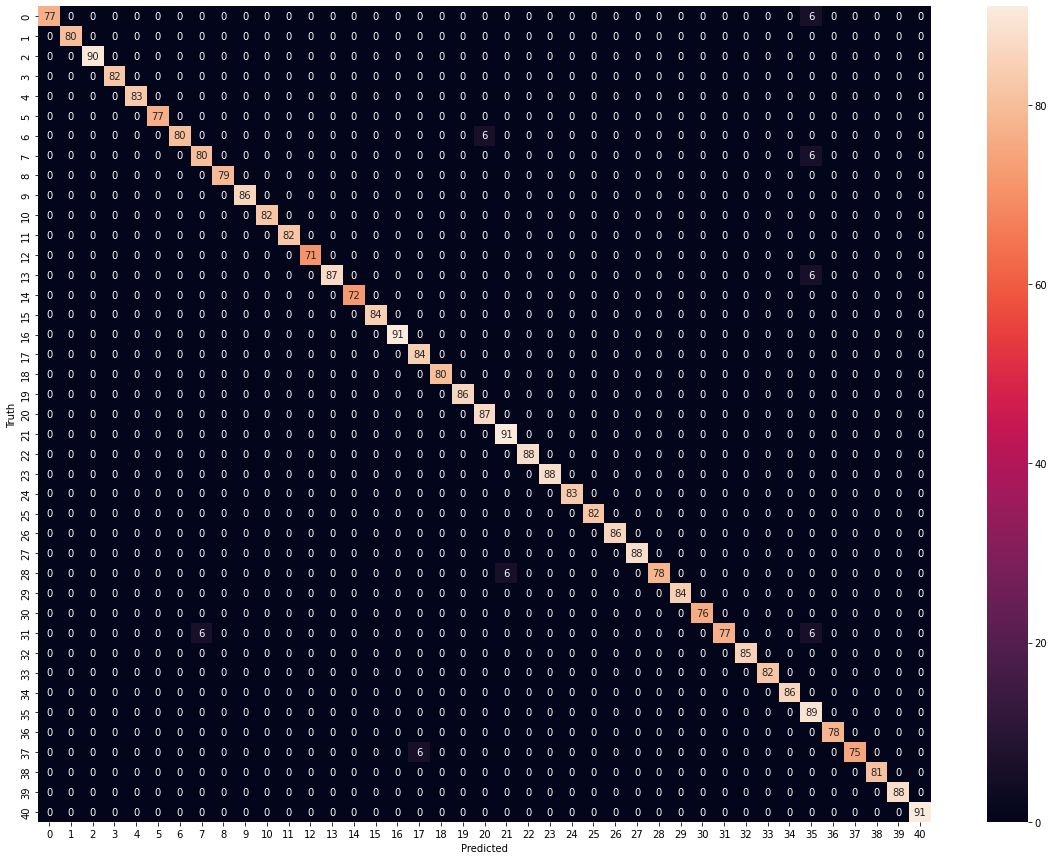

In [181]:
plt.figure(figsize = (20,15))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        83
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00        77
           6       1.00      0.93      0.96        86
           7       0.93      0.93      0.93        86
           8       1.00      1.00      1.00        79
           9       1.00      1.00      1.00        86
          10       1.00      1.00      1.00        82
          11       1.00      1.00      1.00        82
          12       1.00      1.00      1.00        71
          13       1.00      0.94      0.97        93
          14       1.00      1.00      1.00        72
          15       1.00      1.00      1.00        84
          16       1.00      1.00      1.00        91
          17       0.93    

In [183]:
model.score(x_test,y_test)

0.9860627177700348

In [184]:
np.where(df.columns=='chills')

(array([5], dtype=int64),)

In [185]:
np.where(df.columns=='chills')[0]

array([5], dtype=int64)

In [186]:
np.where(df.columns=='chills')[0][0]

5

In [187]:
diseases = dis.classes_
sym_attrs = df.drop('prognosis',axis=1).columns
def predict_disease(symptoms):
    sym_indices = [np.where(sym_attrs==sym)[0][0] for sym in symptoms]
    x = np.zeros(len(sym_attrs))
    for idx in sym_indices:
        x[idx]=1
    pred = model.predict([x])[0]
    return diseases[pred]

In [188]:
diseases

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [189]:
diseases[15], diseases[27]

('Fungal infection', 'Impetigo')

In [135]:
len(sym_attrs)

132

In [204]:
predict_disease(['shivering','skin_rash','itching'])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Allergy'

In [145]:
import pickle

In [147]:
with open("model","wb") as f:
    pickle.dump([model,diseases,sym_attrs],f)